<a href="https://colab.research.google.com/github/swarnava-96/DNA-Sequence-Cassifier-using-NLP/blob/main/DNA_Sequence_Classifier_on_Dog_Genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DNA Sequence Classifier using NLP**
In this project, we will apply a Machine Learning Classification model on dog gene sequences dataset that can predict genes function based on DNA sequence (coding sequence) alone.

### Importing the necessary libraries

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Data

In [44]:
dog_data = pd.read_table("dog_data.txt")
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [45]:
# Lets see the shape of the data

dog_data.shape

(820, 2)

We have some data for dog DNA sequence coding regions and a class label. 
Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [46]:
# Lets create a function to convert sequence strings into k-mer words, default size = 6 (Hexamer words)

def getKmers(sequence, size = 6):
  return [sequence[x : x + size].lower() for x in range(len(sequence) - size + 1)]

Now we can convert our training data sequences into short overlapping k-mers of legth 6.

In [47]:
dog_data["words"] = dog_data.apply(lambda x : getKmers(x["sequence"]), axis = 1)
dog_data  = dog_data.drop("sequence", axis = 1)

Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step. Let's take a look.

In [48]:
dog_data.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels.

In [49]:
dog_texts = list(dog_data["words"])
for item in range(len(dog_texts)):
  dog_texts[item] = " ".join(dog_texts[item])

# Lets create our target feature
y_data = dog_data.iloc[:, 0].values

In [50]:
# Lets check

print(dog_texts[2])

atggaa tggaaa ggaaac gaaaca aaacac aacacc acaccc caccct accctt cccttc ccttct cttcta ttctac tctacg ctacgg tacggc acggcg cggcga ggcgat gcgatg cgatga gatgag atgagg tgaggc gaggcg aggcgc ggcgct gcgctg cgctga gctgag ctgagc tgagcg gagcgg agcggc gcggcc cggcct ggcctg gcctgg cctggg ctgggc tgggcg gggcgg ggcggc gcggcg cggcgg ggcggc gcggcg cggcgt ggcgtc gcgtca cgtcag gtcagt tcagta cagtag agtagc gtagca tagcag agcagt gcagtg cagtgg agtggc gtggcg tggcgg ggcggc gcggcg cggcgg ggcggt gcggtg cggtgg ggtggt gtggta tggtag ggtagc gtagct tagctt agcttc gcttcg cttcgc ttcgcg tcgcgt cgcgtc gcgtcc cgtccc gtcccc tccccg ccccgg cccggg ccgggt cgggtc gggtcg ggtcgc gtcgcc tcgcct cgcctg gcctgt cctgtt ctgttt tgtttc gtttcc tttccc ttcccg tcccgg cccggg ccgggg cggggc ggggcg gggcgc ggcgcc gcgccc cgcccc gccccc cccccg ccccga cccgac ccgacg cgacgg gacggc acggcg cggcgg ggcggc gcggcg cggcga ggcgac gcgact cgactg gactgg actggc ctggca tggcag ggcagc gcagca cagcat agcatg gcatga catgat atgatg tgatga gatgaa atgaag tgaaga gaagaa aagaaa agaaag

In [51]:
y_data

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

Now, we will apply the BAG of WORDS using CountVectorizer. This is equivalent to k-mer counting. The n-gram size of 4 was previously determined by testing

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(dog_texts)

In [53]:
# Lets see the shape of the vector X

X.shape

(820, 227149)

If we have a look at class balance we can see we have relatively balanced dataset.

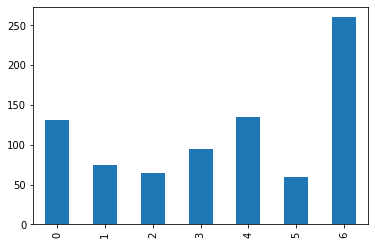

In [54]:
dog_data["class"].value_counts().sort_index().plot.bar();

In [55]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state = 42)

In [56]:
# Lets see the shape of the train and test datasets
print(X_train.shape)
print(X_test.shape)

(656, 227149)
(164, 227149)


A multinomial naive Bayes classifier will be created. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best.

In [57]:
from sklearn.naive_bayes import  MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [58]:
# Prediction

y_pred = classifier.predict(X_test)

Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data.

In [59]:
# Validation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6951219512195121
[[21  0  0  0  0  0  6]
 [ 2 12  0  0  0  0  5]
 [ 1  0 10  0  0  0  3]
 [ 1  0  0  8  0  0  7]
 [ 3  0  0  2  7  0 11]
 [ 2  0  0  1  0  5  5]
 [ 0  0  0  1  0  0 51]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       1.00      0.63      0.77        19
           2       1.00      0.71      0.83        14
           3       0.67      0.50      0.57        16
           4       1.00      0.30      0.47        23
           5       1.00      0.38      0.56        13
           6       0.58      0.98      0.73        52

    accuracy                           0.70       164
   macro avg       0.85      0.61      0.67       164
weighted avg       0.78      0.70      0.68       164



We can conclude that the model performed okaish from the above metrics scores.